In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and preprocessing dataset

In [ ]:
df = pd.read_csv('cirrhosis.csv')

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


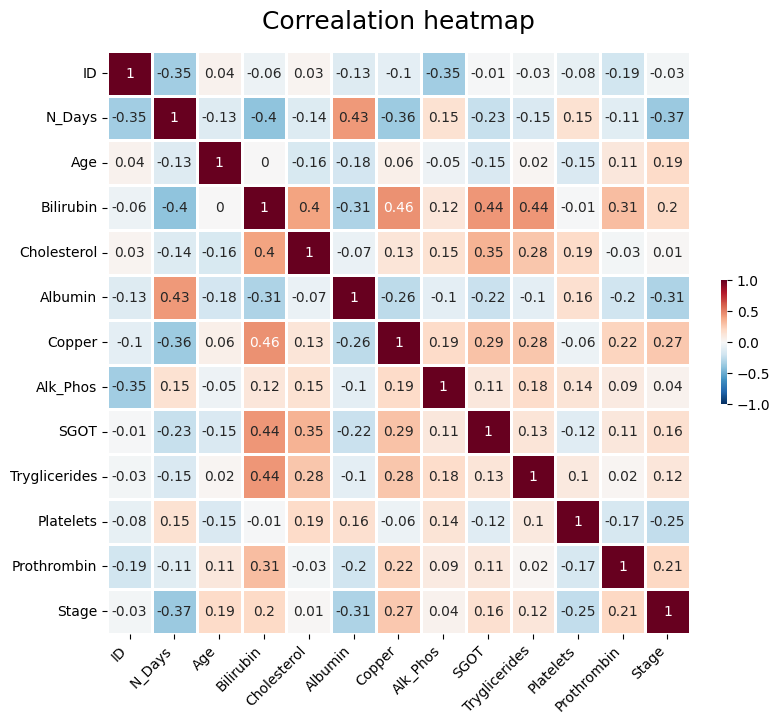

In [ ]:

plt.figure(figsize=(8, 8))

heatmap = sns.heatmap(
    df.corr(method="pearson", numeric_only=True).round(2),
    annot=True,
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Correalation heatmap", fontdict={"fontsize": 18}, pad=16)
plt.show()

high correlation between independent variables isn't present, moving on

In [ ]:
!pip install scikit-survival -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 19.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.preprocessing import OneHotEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df['Drug'].unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [ ]:
df['Ascites'].unique()

array(['Y', 'N', nan], dtype=object)

In [ ]:
df['Edema'].unique()

array(['Y', 'N', 'S'], dtype=object)

In [ ]:
df['Drug'] = df['Drug'].fillna('None')
df['Ascites'] = df['Ascites'].fillna('N')
df['Edema']= df['Edema'].fillna('N')
df['Spiders'] = df['Spiders'].fillna('N')
df['Hepatomegaly'] = df['Hepatomegaly'].fillna('N')

In [ ]:
df['Status'] = df['Status'].replace({'C': 0, 'CL': 0, 'D': 1})

df['Status'] = df['Status'].astype('float64')
df.head(20)

<ipython-input-12-d1dbe216bd49>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status'] = df['Status'].replace({'C': 0, 'CL': 0, 'D': 1})


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1.0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0.0,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,1.0,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,1.0,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,0.0,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,1.0,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,0.0,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,1.0,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,1.0,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,1.0,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1.0,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0.0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,1.0,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,1.0,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,0.0,2,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
!pip install lifelines -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.4 MB/s eta 0:00:00


# Estimation of mortality rate

We are going to do KM to look whether this dataset provides adequate results for survival rate, then we use Nelson-Aalen estimator for the mortality rate plot and then get the slope coefficient by fitting linear regression to this plot.

First version: time from diagnosis in days

In [ ]:
new_df = df[['ID', 'Status', 'N_Days']]
new_df = new_df.rename(columns={'Status': 'E'})
new_df = new_df.rename(columns={'N_Days': 'T'})

In [ ]:
from lifelines import KaplanMeierFitter
T = new_df['T']
km = KaplanMeierFitter(alpha=0.05) #alpha - level of significance for confidence interval estimation, see below.
km.fit(T)
km.event_table.head(7)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,418,418
41.0,2,2,0,0,418
43.0,1,1,0,0,416
51.0,1,1,0,0,415
71.0,1,1,0,0,414
77.0,1,1,0,0,413
94.0,1,1,0,0,412


In [ ]:
test = km.event_table
test['p'] = 1 - test['removed'] / test['at_risk']
test['S'] = test['p'].cumprod()
test.head(7)

,removed,observed,censored,entrance,at_risk,p,S
event_at,,,,,,,
0.0,0,0,0,418,418,1.000000,1.000000
41.0,2,2,0,0,418,0.995215,0.995215
43.0,1,1,0,0,416,0.997596,0.992823
51.0,1,1,0,0,415,0.997590,0.990431
71.0,1,1,0,0,414,0.997585,0.988038
77.0,1,1,0,0,413,0.997579,0.985646
94.0,1,1,0,0,412,0.997573,0.983254


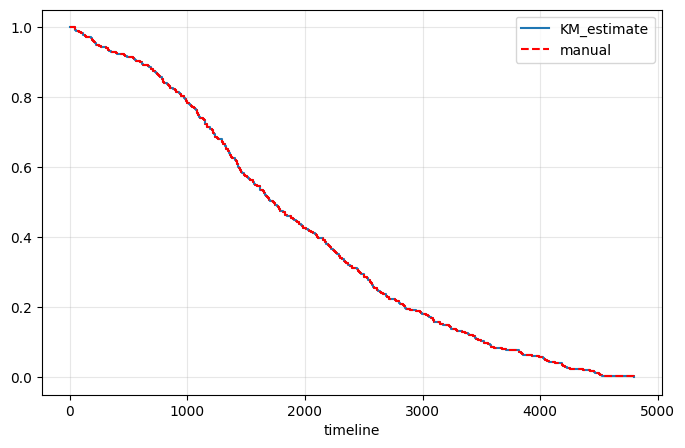

In [ ]:
ax = km.plot_survival_function(figsize=(8,5), ci_show=False)
ax.step(test.index, test['S'], where='post', label='manual', ls='--', color='red')
ax.legend();
ax.grid(alpha=0.3);

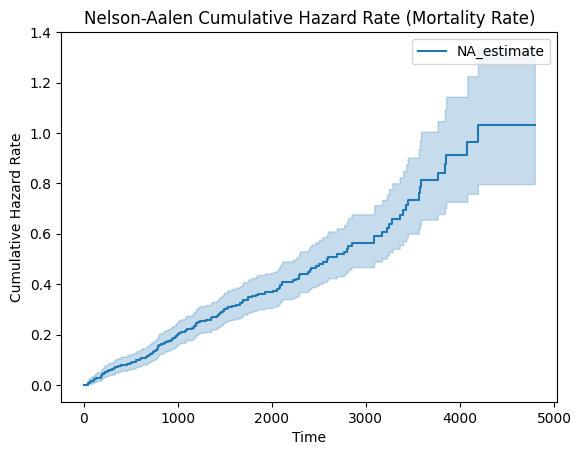

In [ ]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(new_df['T'], event_observed=new_df['E'])

naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression

time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]

log_cumulative_hazard_values = np.log(cumulative_hazard_values)

regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

Slope (k): [0.00068754]
Intercept (b): [-2.54197028]


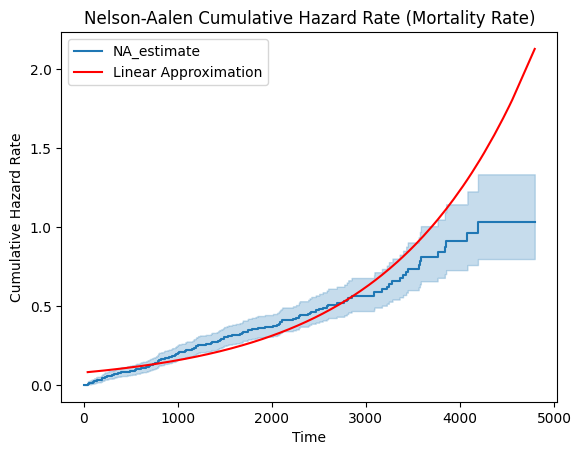

In [ ]:
naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()

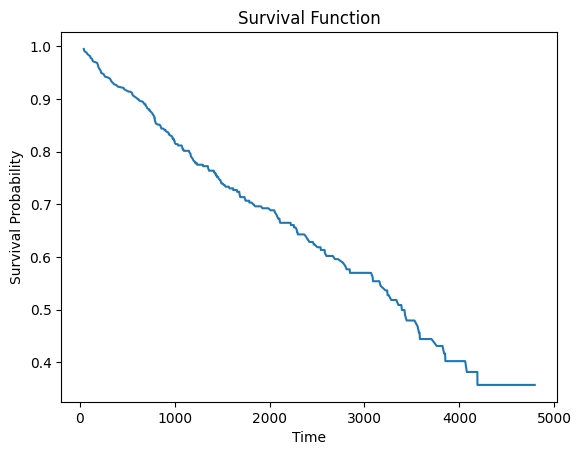

In [ ]:
survival_function = np.exp(-cumulative_hazard_values)
plt.plot(time_points, survival_function)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Function')
plt.show()

Second option: time from diagnosis in years

In [ ]:
n_df = new_df.copy()
n_df['T'] = n_df['T'] / 365.25

Slope (k): [0.25112485]
Intercept (b): [-2.54197028]


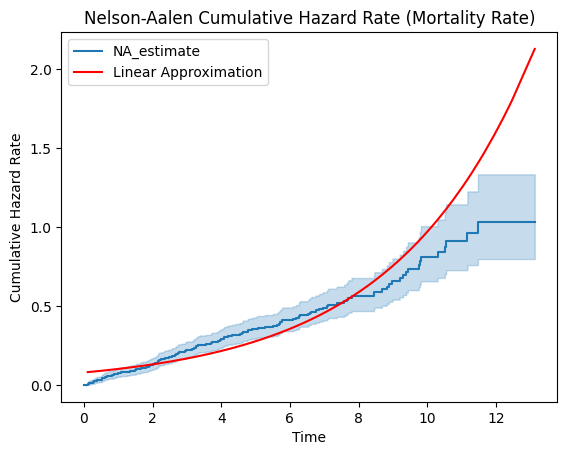

In [ ]:


naf.fit(n_df['T'], event_observed=n_df['E'])
time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]

log_cumulative_hazard_values = np.log(cumulative_hazard_values)

regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')
plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()


In [ ]:
new1_df = df[['ID', 'Status', 'Age']]
new1_df = new1_df.rename(columns={'Status': 'E'})
new1_df = new1_df.rename(columns={'Age': 'T'})

Third option: age in years

In [ ]:
new1_df['T'] = new1_df['T'] / 365.25

In [ ]:
new1_df.head(30)

,ID,E,T
0,1,1.0,58.765229
1,2,0.0,56.446270
2,3,1.0,70.072553
3,4,1.0,54.740589
4,5,0.0,38.105407
5,6,1.0,66.258727
6,7,0.0,55.534565
7,8,1.0,53.056810
8,9,1.0,42.507871
9,10,1.0,70.559890


In [ ]:
T = new1_df['T']
km = KaplanMeierFitter(alpha=0.05) #alpha - level of significance for confidence interval estimation
km.fit(T)
km.event_table.head(7)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,418,418
26.277892,1,1,0,0,418
28.884326,1,1,0,0,417
29.555099,1,1,0,0,416
30.275154,1,1,0,0,415
30.573580,1,1,0,0,414
30.863792,1,1,0,0,413


In [ ]:
test = km.event_table
test['p'] = 1 - test['removed'] / test['at_risk']
test['S'] = test['p'].cumprod()
test.head(7)

,removed,observed,censored,entrance,at_risk,p,S
event_at,,,,,,,
0.000000,0,0,0,418,418,1.000000,1.000000
26.277892,1,1,0,0,418,0.997608,0.997608
28.884326,1,1,0,0,417,0.997602,0.995215
29.555099,1,1,0,0,416,0.997596,0.992823
30.275154,1,1,0,0,415,0.997590,0.990431
30.573580,1,1,0,0,414,0.997585,0.988038
30.863792,1,1,0,0,413,0.997579,0.985646


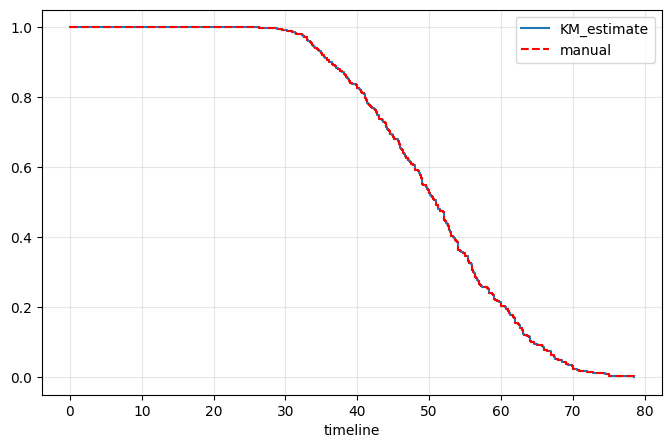

In [ ]:
ax = km.plot_survival_function(figsize=(8,5), ci_show=False)
ax.step(test.index, test['S'], where='post', label='manual', ls='--', color='red')
ax.legend();
ax.grid(alpha=0.3);

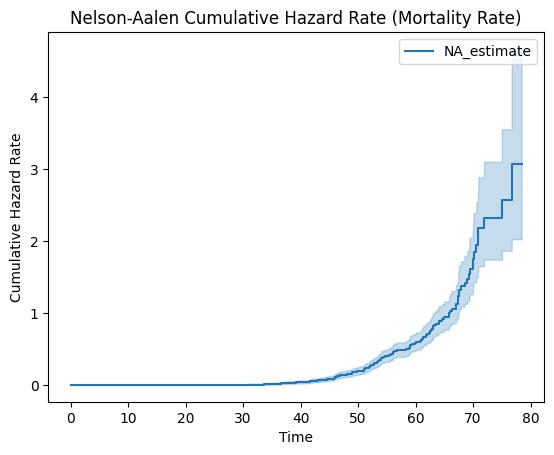

In [ ]:
naf = NelsonAalenFitter()
naf.fit(new1_df['T'], event_observed=new1_df['E'])

naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.show()

In [ ]:
time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]


log_cumulative_hazard_values = np.log(cumulative_hazard_values + 7e-2)
#log_cumulative_hazard_values = np.log(cumulative_hazard_values + 9e-2) #lower bound
#log_cumulative_hazard_values = np.log(cumulative_hazard_values + 2e-2) #upper bound
regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

Slope (k): [0.0874981]
Intercept (b): [-5.65743877]


Poisson regression attempt

In [ ]:
from sklearn.linear_model import PoissonRegressor

time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]
log_cumulative_hazard_values = np.log(cumulative_hazard_values + 1)  # shift so it isn't 0

X = time_points.reshape(-1, 1)
y = log_cumulative_hazard_values

poisson_model = PoissonRegressor(alpha=0)  # alpha=0 for no regularization
poisson_model.fit(X, y)

k = poisson_model.coef_[0]
b = poisson_model.intercept_
print("Slope (k):", k)
print("Intercept (b):", b)
y_pred = poisson_model.predict(X)
print("Predicted values:", y_pred)

Slope (k): 0.09246606727448688
Intercept (b): -6.428333208420656
Predicted values: [0.01834277 0.02334171 0.0248353  0.02654514 0.02728783 0.02803
 0.02940376 0.02957546 0.03181235 0.03258672 0.03261973 0.03295173
 0.03399394 0.03414919 0.03463677 0.03473336 0.03568707 0.03615997
 0.03621494 0.0364172  0.03699331 0.0372659  0.03746454 0.03759756
 0.03879653 0.03958025 0.03963038 0.04061561 0.04103937 0.04109135
 0.04142559 0.0416675  0.04228382 0.0424447  0.04299626 0.04317077
 0.04421042 0.04423281 0.04506926 0.04540136 0.04717051 0.04734998
 0.0477593  0.0490831  0.04943226 0.04969576 0.05072533 0.05217096
 0.05228996 0.05322486 0.05421763 0.05468631 0.05475558 0.05583341
 0.05617367 0.05625906 0.05675976 0.05742461 0.05822977 0.05867369
 0.05898645 0.0594813  0.06057543 0.06438628 0.06523948 0.06647317
 0.06682751 0.06766165 0.06797068 0.06866247 0.06971338 0.07019152
 0.07090591 0.07155508 0.07217364 0.07257673 0.07268706 0.07303753
 0.07394918 0.07408034 0.0741554  0.07421174 0.07

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


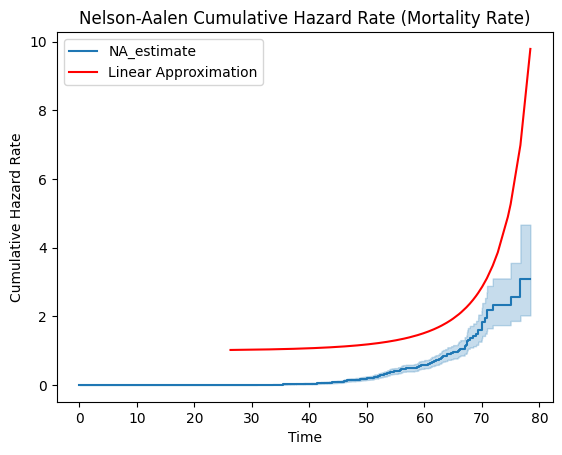

In [ ]:
naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.plot(time_points, np.exp(poisson_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()

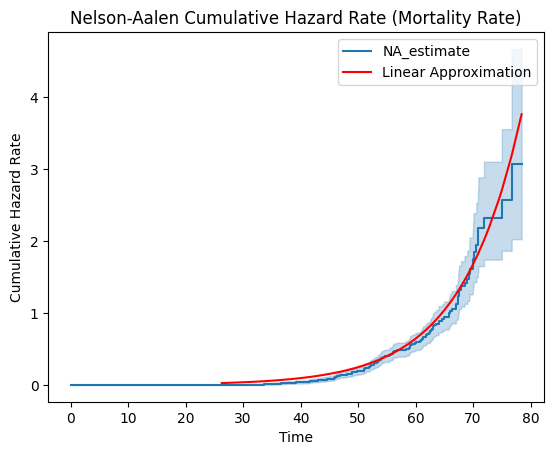

In [ ]:
naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()

In [ ]:
shift_values = np.linspace(1e-2, 9e-2, 9)
results = {}

for shift in shift_values:

    log_cumulative_hazard_values = np.log(cumulative_hazard_values + shift)

    regression_model = LinearRegression()
    regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

    k = regression_model.coef_[0]
    b = regression_model.intercept_

    y_pred = regression_model.predict(time_points.reshape(-1, 1))

    residuals = log_cumulative_hazard_values - y_pred

    ssd = np.sum(residuals ** 2)

    results[shift] = {'slope': k, 'intercept': b, 'sum_squared_diff': ssd}

best_shift = min(results, key=lambda x: results[x]['sum_squared_diff'])
best_fit = results[best_shift]

print("Best shift:", best_shift)
print("Slope (k):", best_fit['slope'])
print("Intercept (b):", best_fit['intercept'])
print("Sum of squared differences:", best_fit['sum_squared_diff'])

Best shift: 0.04
Slope (k): [0.1009343]
Intercept (b): [-6.51245289]
Sum of squared differences: 3.5245866655893576


In [ ]:
time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]

log_cumulative_hazard_values = np.log(cumulative_hazard_values + 4e-2)
#log_cumulative_hazard_values = np.log(cumulative_hazard_values + 7e-2)
#log_cumulative_hazard_values = np.log(cumulative_hazard_values + 9e-2) #lower bound
#log_cumulative_hazard_values = np.log(cumulative_hazard_values + 2e-2) #upper bound
regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

Slope (k): [0.1009343]
Intercept (b): [-6.51245289]


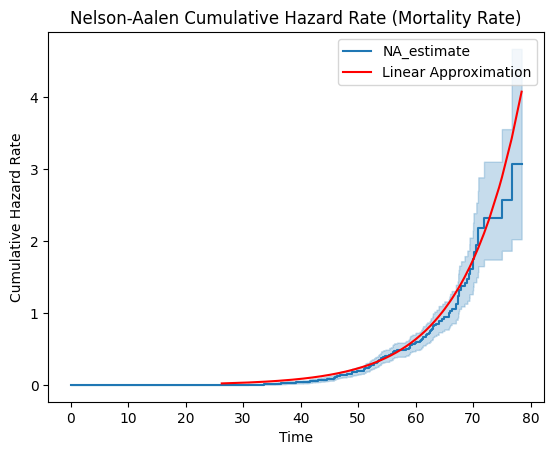

In [ ]:
naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()

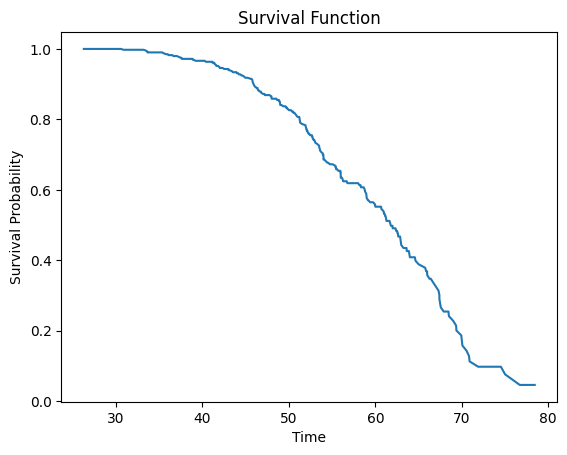

In [ ]:
survival_function = np.exp(-cumulative_hazard_values)
plt.plot(time_points, survival_function)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Function')
plt.show()